In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import umap

import seaborn as sns

from sklearn.datasets import make_classification, make_blobs
from sklearn.decomposition import PCA
from sklearn import mixture
from sklearn.metrics.cluster import adjusted_rand_score as ari

#This needs to be initialized for UMAP repeatability
np.random.seed(15)

from sklearn.model_selection import train_test_split

import datetime

In [2]:
from edviz_help import pre_proc, compare_clusters, describe_cluster, pre_proc_no_norm

In [3]:
from itertools import cycle

In [4]:
def plot_without_clusters(df, ax):
    df.plot.scatter(x = 0, y = 1, s = 0.5, ax=ax, label=f'All df', c='black')
    ax.set_xlabel('Embedding Variable 1', fontsize = 22)
    ax.set_ylabel('Embedding Variable 2', fontsize = 22)
    ax.legend(markerscale=5)
    ax.set_title(f'Embedded/unlabled Data', fontsize = 22)

In [5]:
def plot_with_clusters(df, ax, legend=True):    
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    colors = cycle(colors)
    
    for cluster, color in zip(df.y.unique(), colors):
        clust_df = df[df.y == cluster]
        clust_df.plot.scatter(x = 0, y = 1, s = 0.5, ax=ax, label=f'Cluster {cluster}', c=color)
        
    ax.set_xlabel('Embedding Variable 1', fontsize = 22)
    ax.set_ylabel('Embedding Variable 2', fontsize = 22)
    ax.legend(markerscale=5)
    ax.set_title(f'GMM-Clustered Data', fontsize = 22)
    if legend == False:
        ax.get_legend().remove()

In [6]:
def find_pairwise_ari(train_embedding, test_embedding, clust_range=range(2,20)):
    mean_ari = []
    for n_components in clust_range:
        pred_labels = []
        for train, test in zip(train_embedding, test_embedding):
            gmm = mixture.GaussianMixture(n_components=n_components, random_state=17)
            gmm.fit(train)
            pred_labels.append(gmm.predict(test))
            
        pairwise_ari_vals = []
        for i in range(len(pred_labels)):
            for j in range(i):
                pairwise_ari_vals.append(ari(pred_labels[i], pred_labels[j]))
        mean_ari.append(np.mean(pairwise_ari_vals))
        
    returned_ari = pd.DataFrame(index=clust_range)
    returned_ari['pairwise'] = mean_ari
    
    return returned_ari

In [7]:
N_CLUSTERS = 2
target_cc = 'cc_abdominalpain'

In [8]:
target_cc[3:]

'abdominalpain'

In [9]:
embedding_train = [np.genfromtxt(f'grid_search_data/{target_cc[3:]}_150_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
embedding_test =  [np.genfromtxt(f'grid_search_data/{target_cc[3:]}_150_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
#sob_150_0_ari = find_pairwise_ari(sob_150_0_train, sob_15_00_test)

9770(90%)/1093(10%)
9923(91%)/940(9%)
8789(81%)/2074(19%)
9191(85%)/1672(15%)
10760(99%)/103(1%)


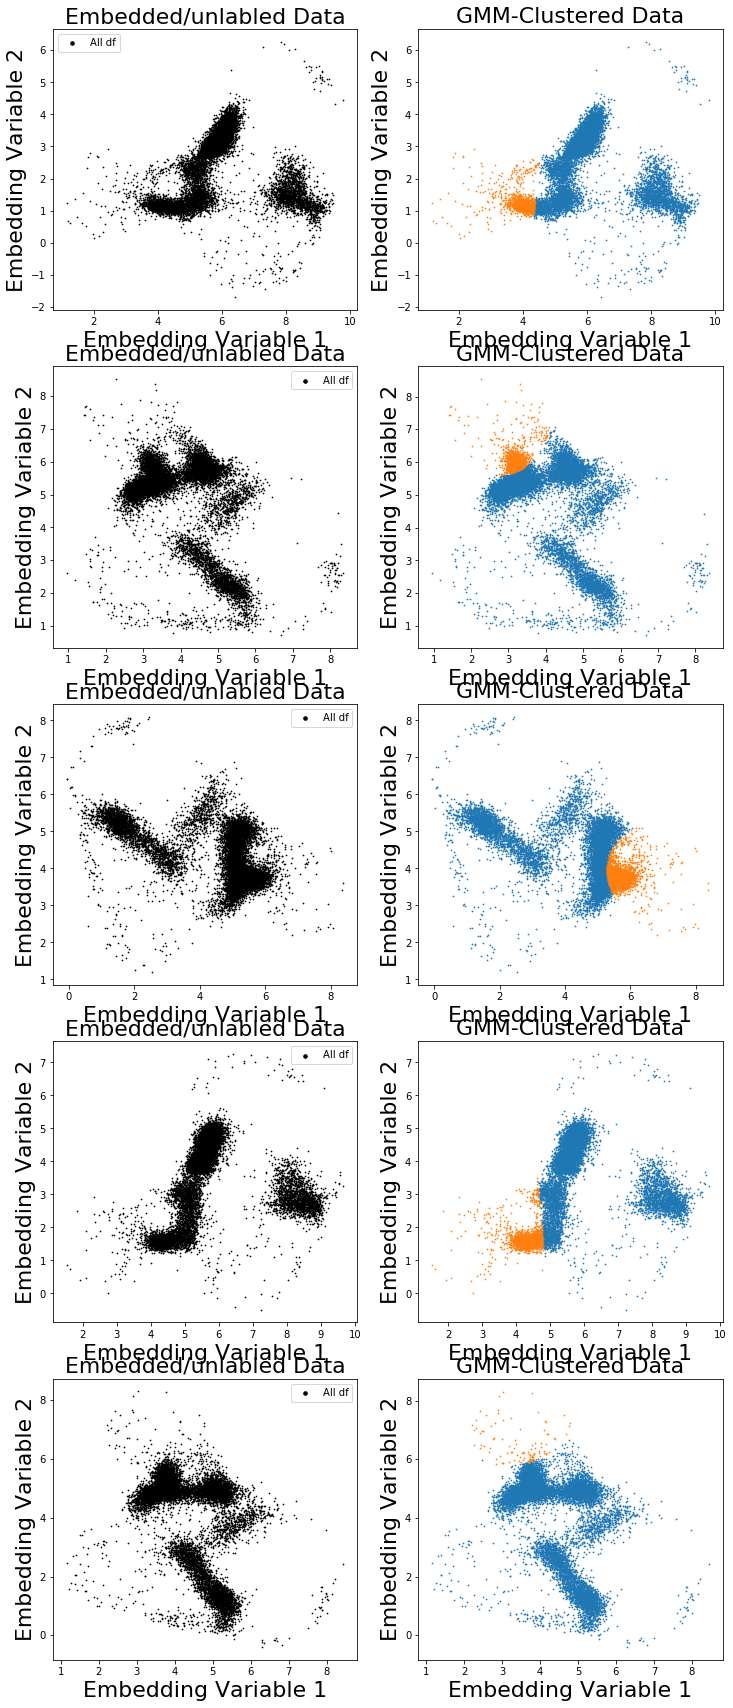

In [10]:
f, _ax = plt.subplots(ncols=2, nrows=5, figsize=(12,30))
ax = _ax.flatten()

pred_clusts_c = []
ax_ind = 0 
for train, test in zip(embedding_train, embedding_test):
    gmm = mixture.GaussianMixture(n_components=N_CLUSTERS, random_state=42)
    gmm.fit(train)
    
    pred_clusts_c.append(gmm.predict(test))
    
    data = pd.DataFrame(test)
    plot_without_clusters(data, ax[ax_ind])
    ax_ind += 1
    
    
    data['y'] = pred_clusts_c[-1]
    print('/'.join([f'{foo}({foo/data.shape[0] * 100:.0f}%)' for foo in data['y'].value_counts()]))
    plot_with_clusters(data, ax[ax_ind], legend=False)
    ax_ind += 1

In [11]:
train = embedding_train[0]
test =  embedding_test[0]

0    10863
Name: y, dtype: int64
1    9770
0    1093
Name: y, dtype: int64
0    7696
1    1794
2    1373
Name: y, dtype: int64
1    5839
0    3637
2    1359
3      28
Name: y, dtype: int64
1    4351
4    4246
0    1762
2     474
3      30
Name: y, dtype: int64


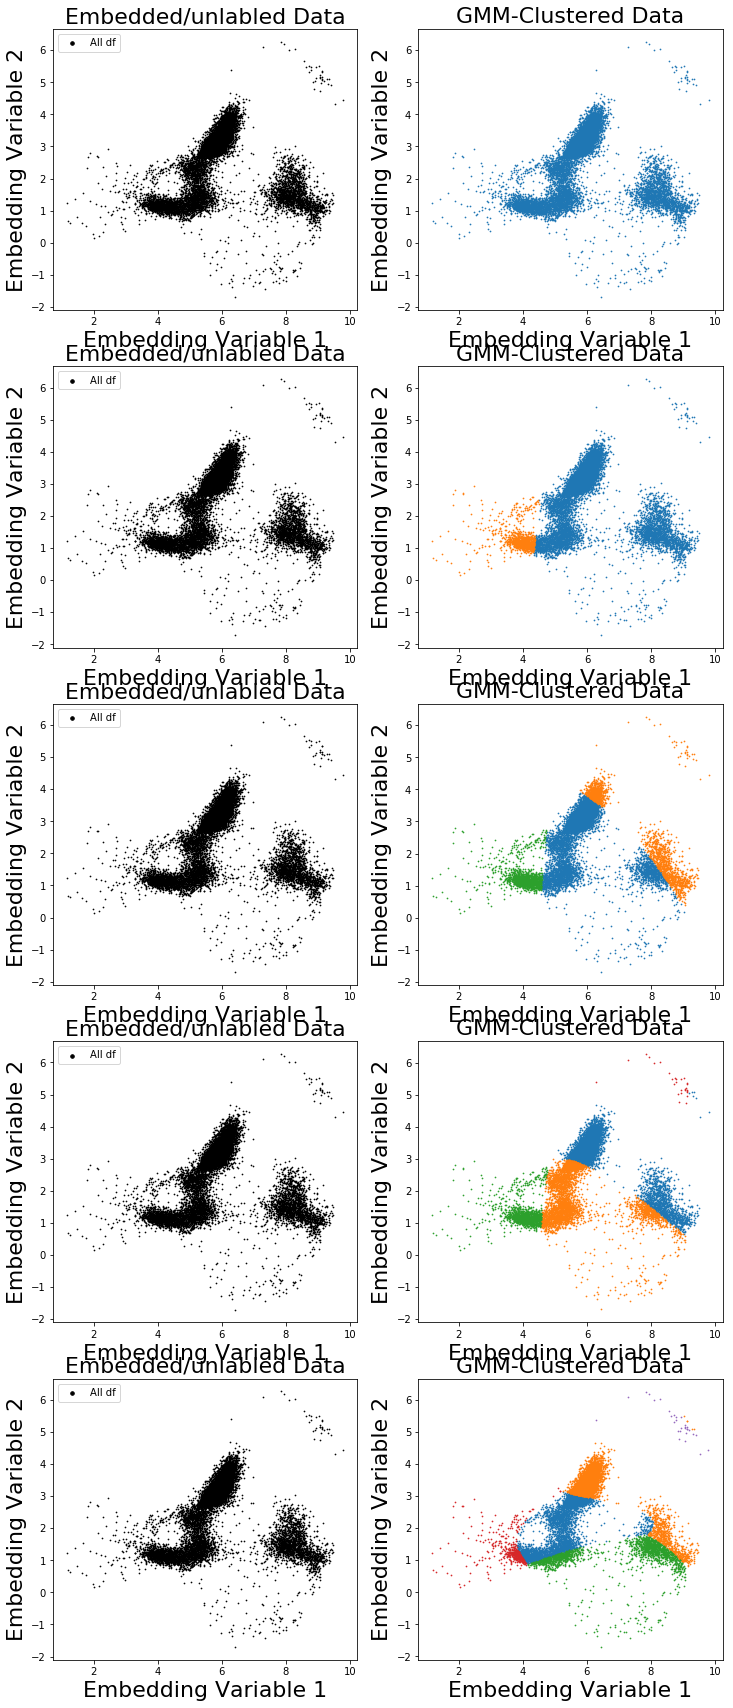

In [12]:
f, _ax = plt.subplots(ncols=2, nrows=5, figsize=(12,30))
ax = _ax.flatten()

pred_clusts_c = []
ax_ind = 0 
for n_components in range(N_CLUSTERS-1,N_CLUSTERS+4):
    gmm = mixture.GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(train)
    
    pred_clusts_c.append(gmm.predict(test))
    
    data = pd.DataFrame(test)
    plot_without_clusters(data, ax[ax_ind])
    ax_ind += 1
    
    
    data['y'] = pred_clusts_c[-1]
    print(data['y'].value_counts())
    plot_with_clusters(data, ax[ax_ind], legend=False)
    ax_ind += 1

In [13]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

Text(0.5, 1.0, 'Unlabeled Data')

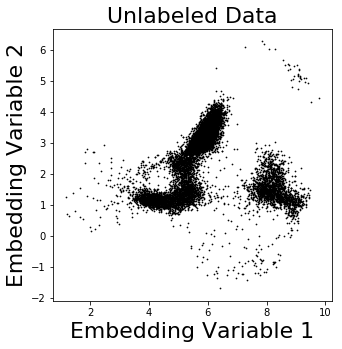

In [14]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

test.plot.scatter(x = 0, y = 1, s = 0.5, ax=ax, label=f'All df', c='black')
ax.set_xlabel('Embedding Variable 1', fontsize = 22)
ax.set_ylabel('Embedding Variable 2', fontsize = 22)
#ax.legend(markerscale=5)
ax.get_legend().remove()
ax.set_title(f'Unlabeled Data', fontsize = 22)

#plot_without_clusters(X_chest_pain, ax)

In [15]:
gmm = mixture.GaussianMixture(n_components=N_CLUSTERS, random_state=17)
gmm.fit(train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=17, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [16]:
pred_labels = gmm.predict(test)
test['y'] = pred_labels

In [17]:
train['y'] = gmm.predict(train)

Text(0.5, 1.0, 'Estimated Clusters')

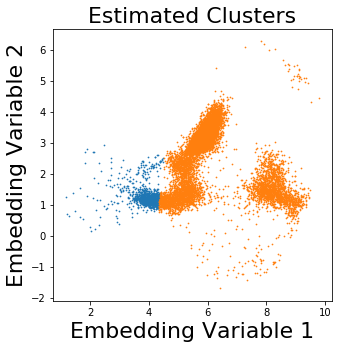

In [18]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for cluster, color in zip(range(N_CLUSTERS), colors):
    clust_df = test[test.y == cluster]
    if clust_df.shape[0]:
        clust_df.plot.scatter(x = 0, y = 1, s = 0.5, ax=ax, label=f'Cluster {cluster}', c=color)

ax.set_xlabel('Embedding Variable 1', fontsize = 22)
ax.set_ylabel('Embedding Variable 2', fontsize = 22)
ax.legend(markerscale=5, loc=4)
ax.get_legend().remove()
ax.set_title(f'Estimated Clusters', fontsize = 22)

In [19]:
ed_data = pd.read_csv('../../edviz_raw.csv')

In [20]:
demographics = demographics = [
    'ethnicity'
    ,'race'
    ,'lang'
    ,'religion'
    ,'maritalstatus'
    ,'employstatus'
    ,'insurance_status'
    ,'dep_name'
    ,'arrivalmode'
    ,'gender'
    ,'previousdispo'
]


other_cat = ['arrivalmonth', 'arrivalday', 'arrivalhour_bin']

to_drop_in_analysis = [
    'ethnicity'
    ,'race'
    ,'lang'
    ,'religion'
    ,'maritalstatus'
    ,'employstatus'
    ,'insurance_status'
    ,'dep_name'
    ,'arrivalmode'
] + other_cat


outcomes = ['disposition', 'esi']

In [29]:
X = ed_data[ed_data[target_cc] == 1]
y = pd.get_dummies(X['disposition']).drop(columns='Discharge')
#X = X.drop(columns=outcomes + to_drop_in_analysis)

X = X.drop(columns=outcomes)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 31415
)
X_test = X_test.copy()
y_test = y_test.copy()

In [31]:
X_test_norm = pre_proc(X_test)

In [32]:
X_test_norm['cluster'] = pred_labels

In [33]:
X_test_norm['admit'] = y_test

In [34]:
X_test_no_norm = pre_proc_no_norm(X_test)

X_test_no_norm['cluster'] = pred_labels
X_test_no_norm['admit'] = y_test

In [45]:
for i in range(N_CLUSTERS):
    print(f'CLUSTER {i}')
    describe_cluster(X_test_norm, X_test_norm[X_test_norm.cluster == i])
    print(f'\n**********************\n')

CLUSTER 0
There are 1093 samples (10.061677%) in this peak.
20.68% of the patients in this cluster were admitted, compared to 35.84% overall.
This cluster is notable for these features above the mean:


previousdispo_No previous dispo    0.089937
previousdispo_Discharge            0.087496
dbp_min                            0.060459
pulse_min                          0.041302
resp_min                           0.034064
sbp_min                            0.032831
gender_Female                      0.028976
temp_min                           0.020757
spo2_min                           0.018953
sexualinfxs                        0.018307
Name: mean, dtype: float64

This cluster is notable for these features below the mean:


previousdispo_Admit   -0.190315
htn                   -0.176429
admit                 -0.151602
esophgealdx           -0.114989
hyperlipidem          -0.111572
mooddisorders         -0.104302
age                   -0.095828
unclassified          -0.093294
proteinua_last        -0.089069
o2_device_max         -0.084901
Name: mean, dtype: float64


**********************

CLUSTER 1
There are 9770 samples (89.938323%) in this peak.
37.53% of the patients in this cluster were admitted, compared to 35.84% overall.
This cluster is notable for these features above the mean:


previousdispo_Admit    0.021291
htn                    0.019738
admit                  0.016960
esophgealdx            0.012864
hyperlipidem           0.012482
mooddisorders          0.011669
age                    0.010721
unclassified           0.010437
proteinua_last         0.009964
o2_device_max          0.009498
Name: mean, dtype: float64

This cluster is notable for these features below the mean:


previousdispo_No previous dispo   -0.010062
previousdispo_Discharge           -0.009788
dbp_min                           -0.006764
pulse_min                         -0.004621
resp_min                          -0.003811
sbp_min                           -0.003673
gender_Female                     -0.003242
temp_min                          -0.002322
spo2_min                          -0.002120
sexualinfxs                       -0.002048
Name: mean, dtype: float64


**********************



In [35]:
descriptors = [
    'age',
    'gender_Male',
    'insurance_status_Medicaid',
    'insurance_status_Medicare',
    'lang_English',
    'arrivalmode_ambulance',
    'triage_vital_hr',
    'triage_vital_sbp',
    'triage_vital_dbp',
    'triage_vital_rr',
    'triage_vital_o2',
    'triage_vital_o2_device',
    'triage_vital_temp',
    'n_admissions',
    'admit'
]

In [36]:
for i in range(N_CLUSTERS):
    print(f'CLUSTER {i}')
    foo = X_test_no_norm[X_test_no_norm['cluster'] == i][descriptors].describe().T
    #foo['count'] = (foo['count'] * foo['mean']).astype(int)
    display(foo)

CLUSTER 0


,count,mean,std,min,25%,50%,75%,max
age,1093.0,37.785910,14.308733,18.0,26.000000,35.000000,47.000000,89.0
gender_Male,1093.0,0.324794,0.468512,0.0,0.000000,0.000000,1.000000,1.0
insurance_status_Medicaid,1093.0,0.493138,0.500182,0.0,0.000000,0.000000,1.000000,1.0
insurance_status_Medicare,1093.0,0.055810,0.229659,0.0,0.000000,0.000000,0.000000,1.0
lang_English,1093.0,0.657823,0.474656,0.0,0.000000,1.000000,1.000000,1.0
arrivalmode_ambulance,1093.0,0.094236,0.292291,0.0,0.000000,0.000000,0.000000,1.0
triage_vital_hr,1093.0,83.671751,14.590574,43.0,74.000000,85.000000,91.000000,148.0
triage_vital_sbp,1093.0,129.346567,17.867227,82.0,117.000000,130.000000,137.000000,232.0
triage_vital_dbp,1093.0,79.556717,11.676236,40.0,72.000000,80.482461,86.000000,128.0
triage_vital_rr,1093.0,17.518596,1.551364,13.0,16.000000,17.628239,18.000000,28.0


CLUSTER 1


,count,mean,std,min,25%,50%,75%,max
age,9770.0,46.842579,18.783175,18.0,31.000000,45.000000,60.000000,103.0
gender_Male,9770.0,0.357011,0.479143,0.0,0.000000,0.000000,1.000000,1.0
insurance_status_Medicaid,9770.0,0.374207,0.483942,0.0,0.000000,0.000000,1.000000,1.0
insurance_status_Medicare,9770.0,0.179427,0.383729,0.0,0.000000,0.000000,0.000000,1.0
lang_English,9770.0,0.919243,0.272476,0.0,1.000000,1.000000,1.000000,1.0
arrivalmode_ambulance,9770.0,0.251177,0.433712,0.0,0.000000,0.000000,1.000000,1.0
triage_vital_hr,9770.0,86.049323,14.704777,40.0,78.000000,85.810099,92.000000,185.0
triage_vital_sbp,9770.0,132.514284,18.578462,66.0,122.000000,132.195559,139.000000,243.0
triage_vital_dbp,9770.0,80.586027,11.885909,28.0,75.000000,80.482461,86.000000,163.0
triage_vital_rr,9770.0,17.640505,1.551631,10.0,17.000000,17.628239,18.000000,40.0


In [96]:
test['admit'] = y_test.values

No handles with labels found to put in legend.


(-2, 6)

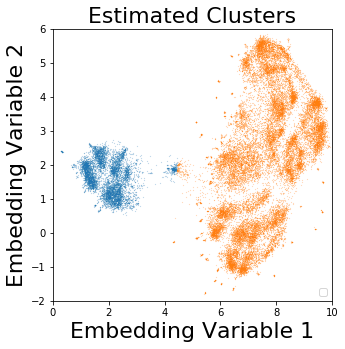

In [103]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

#scores = [test[test['y'] == cluster]['admit'].describe()['mean'] for cluster in range(N_CLUSTERS)]

for cluster, color in zip(range(N_CLUSTERS), colors):
    clust_df = train[train.y == cluster]
    if clust_df.shape[0]:
        #label = f'{cluster}: n = {clust_df.shape[0]}, {scores[cluster]*100:.1f}% admission'
        clust_df.plot.scatter(x = 0, y = 1, s = 0.01, ax=ax, c=color)

ax.set_xlabel('Embedding Variable 1', fontsize = 22)
ax.set_ylabel('Embedding Variable 2', fontsize = 22)
ax.legend(markerscale=50, loc=4)
ax.set_title(f'Estimated Clusters', fontsize = 22)
ax.set_xlim(0,10)
ax.set_ylim(-2,6)

(-2, 6)

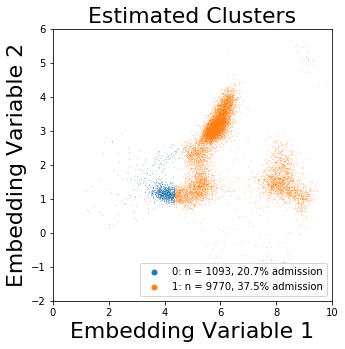

In [104]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

scores = [test[test['y'] == cluster]['admit'].describe()['mean'] for cluster in range(N_CLUSTERS)]

for cluster, color in zip(range(N_CLUSTERS), colors):
    clust_df = test[test.y == cluster]
    if clust_df.shape[0]:
        label = f'{cluster}: n = {clust_df.shape[0]}, {scores[cluster]*100:.1f}% admission'
        clust_df.plot.scatter(x = 0, y = 1, s = 0.01, ax=ax, label=label, c=color)

ax.set_xlabel('Embedding Variable 1', fontsize = 22)
ax.set_ylabel('Embedding Variable 2', fontsize = 22)
ax.legend(markerscale=50, loc=4)
ax.set_title(f'Estimated Clusters', fontsize = 22)


ax.set_xlim(0,10)
ax.set_ylim(-2,6)

Text(0.5, 1.0, 'Estimated Clusters')

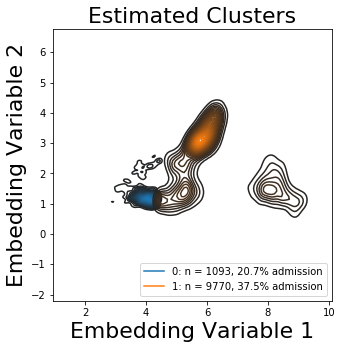

In [48]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

scores = [test[test['y'] == cluster]['admit'].describe()['mean'] for cluster in range(N_CLUSTERS)]

for cluster, color in zip(range(N_CLUSTERS), colors):
    clust_df = test[test.y == cluster]
    if clust_df.shape[0]:
        label = f'{cluster}: n = {clust_df.shape[0]}, {scores[cluster]*100:.1f}% admission'
        sns.kdeplot(clust_df[0], clust_df[1], shade = False, shade_lowest = False, n_levels=40,
                    label = label
                   )
        #clust_df.plot.scatter(x = 0, y = 1, s = 0.5, ax=ax, label=label, c=color)

ax.set_xlabel('Embedding Variable 1', fontsize = 22)
ax.set_ylabel('Embedding Variable 2', fontsize = 22)
ax.legend(markerscale=5, loc=4)
ax.set_title(f'Estimated Clusters', fontsize = 22)

Text(0.5, 1.0, 'Estimated Clusters')

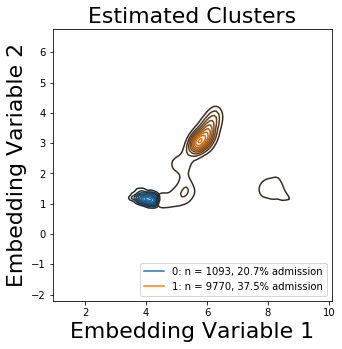

In [49]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

scores = [test[test['y'] == cluster]['admit'].describe()['mean'] for cluster in range(N_CLUSTERS)]

for cluster, color in zip(range(N_CLUSTERS), colors):
    clust_df = test[test.y == cluster]
    if clust_df.shape[0]:
        label = f'{cluster}: n = {clust_df.shape[0]}, {scores[cluster]*100:.1f}% admission'
        sns.kdeplot(clust_df[0], clust_df[1], shade = False, shade_lowest = False, n_levels=10,
                    label = label
                   )
        #clust_df.plot.scatter(x = 0, y = 1, s = 0.5, ax=ax, label=label, c=color)

ax.set_xlabel('Embedding Variable 1', fontsize = 22)
ax.set_ylabel('Embedding Variable 2', fontsize = 22)
ax.legend(markerscale=5, loc=4)
ax.set_title(f'Estimated Clusters', fontsize = 22)

In [73]:
pred_clusts_c = []
ax_ind = 0 
for train, test in zip(embedding_train, embedding_test):
    gmm = mixture.GaussianMixture(n_components=N_CLUSTERS, random_state=42)
    gmm.fit(train)
    
    pred_clusts_c.append(gmm.predict(test))
    
    data = pd.DataFrame(test)    
    
    data['y'] = pred_clusts_c[-1]
    data['admit'] = y_test.values
        
    scores = sorted([data[data['y'] == cluster]['admit'].describe()['mean'] for cluster in range(N_CLUSTERS)], reverse=True)
    print('\t'.join([f'{score*100:.2f}' for score in scores]))
    print('/'.join([f'{foo}({foo/data.shape[0] * 100:.0f}%)' for foo in data['y'].value_counts()]))

37.53	20.68
9770(90%)/1093(10%)
37.34	20.00
9923(91%)/940(9%)
38.70	23.72
8789(81%)/2074(19%)
38.45	21.47
9191(85%)/1672(15%)
35.85	34.95
10760(99%)/103(1%)


In [52]:
data['y'].unique()

array([0, 1])

In [55]:
data['y'].value_counts().index[0]

0

In [57]:
data[data['y'] == 0].admit.sum()

3857

In [66]:
data[data.y == 0].admit.sum()/data.shape[0]

0.3550584553070054

27506(79%)/7255(21%)
9770(90%)/1093(10%)
27799(80%)/6962(20%)
9923(91%)/940(9%)
27327(79%)/7435(21%)
8789(81%)/2074(19%)
27297(79%)/7465(21%)
9191(85%)/1672(15%)
27948(80%)/6814(20%)
10760(99%)/103(1%)


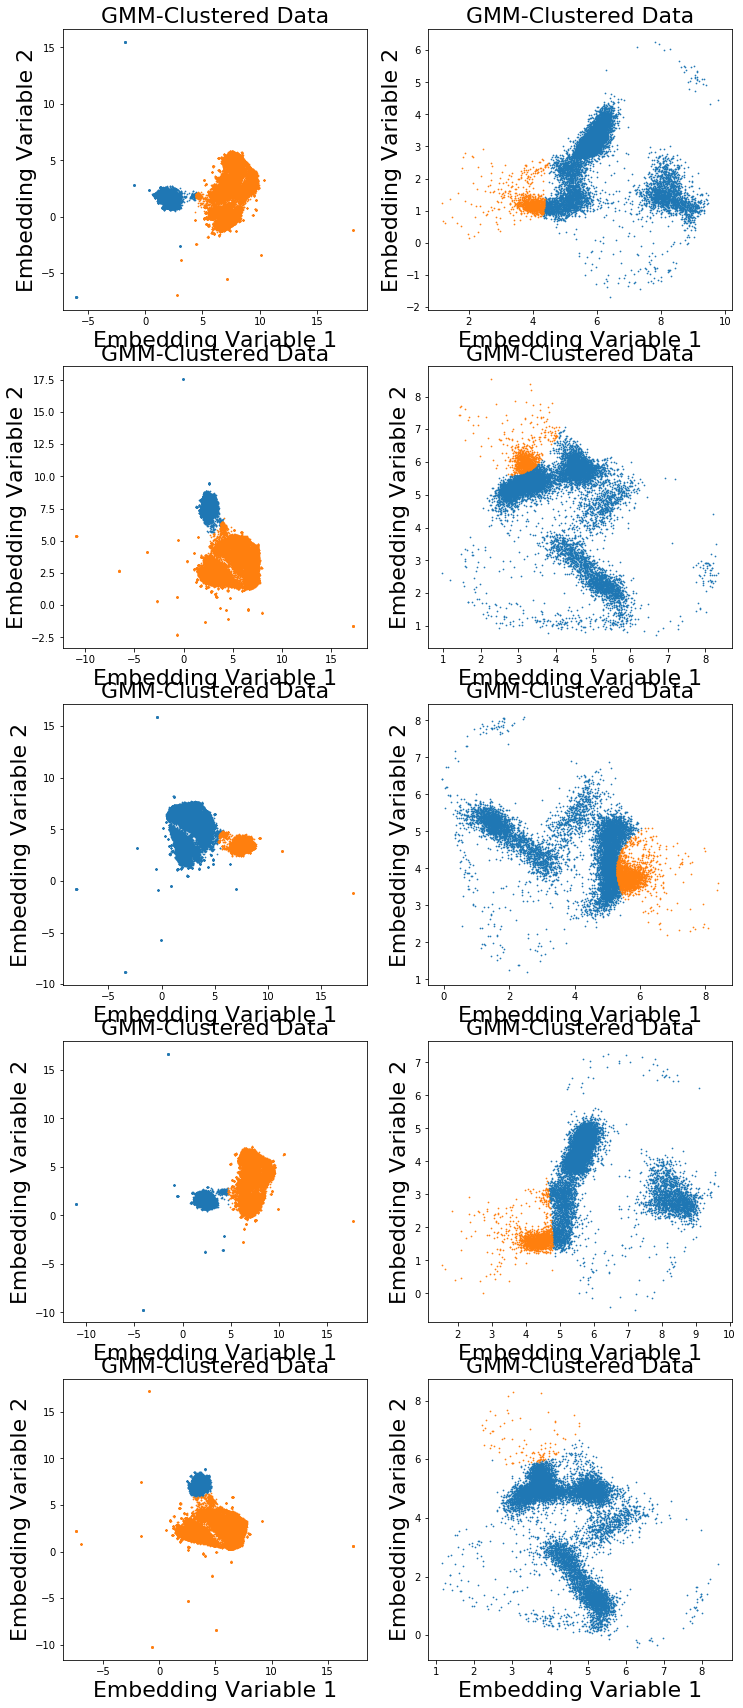

In [105]:
f, _ax = plt.subplots(ncols=2, nrows=5, figsize=(12,30))
ax = _ax.flatten()

pred_clusts_train = []
pred_clusts_test = []
ax_ind = 0 
for train, test in zip(embedding_train, embedding_test):
    gmm = mixture.GaussianMixture(n_components=N_CLUSTERS, random_state=42)
    gmm.fit(train)
    
    pred_clusts_train.append(gmm.predict(train))
    
    data = pd.DataFrame(train)
    data['y'] = pred_clusts_train[-1]
    print('/'.join([f'{foo}({foo/data.shape[0] * 100:.0f}%)' for foo in data['y'].value_counts()]))
    plot_with_clusters(data, ax[ax_ind], legend=False)
    ax_ind += 1
    
    pred_clusts_test.append(gmm.predict(test))
    data = pd.DataFrame(test)
    data['y'] = pred_clusts_test[-1]
    print('/'.join([f'{foo}({foo/data.shape[0] * 100:.0f}%)' for foo in data['y'].value_counts()]))
    plot_with_clusters(data, ax[ax_ind], legend=False)
    ax_ind += 1